In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\david\anaconda3\envs\Dsci\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 45)

In [4]:
ptax_frame = pd.read_excel('data/ON_Ptax/VIEWFIR2021-22.xlsx', skiprows=4)

In [46]:
ptax_frame.head(2)

,Unnamed: 0,Year,Asmt Code,Municipality,MAH Code,MunID,UT,Tier,MSO,Line,Levy Area,22 Levy Area Name,RTC/RTQ,Tax\nBand,Property Class,Tax Rate Description,Tax Ratio,% Full Rate,CVA Assessment,Phase-In Taxable Assessment,LT/ST\nTax Rate,UT\nTax Rate,EDUC\nTax Rate,TOTAL\nTax Rate,LT/ST\nTaxes,UT\nTaxes,EDUC\nTaxes,TOTAL\nTaxes,Last Update
0,10_LT,2021,1134,Addington Highlands Tp,57611,11033,57,LT,12,10,0,Addington Highlands Tp,RT,0,Residential,Full Occupied,1.0,1.0,494713900.0,494713900.0,0.006078,0.004973,0.00153,0.012582,3007109,2460281,756912,6224302,2022-08-29
1,50_LT,2021,1134,Addington Highlands Tp,57611,11033,57,LT,12,50,0,Addington Highlands Tp,MT,0,Multi-Residential,Full Occupied,2.0,1.0,1377000.0,1377000.0,0.012157,0.009946,0.00153,0.023633,16740,13696,2107,32543,2022-08-29


In [47]:
ptax_frame[ptax_frame['Municipality'] == 'Pickering C']

,Unnamed: 0,Year,Asmt Code,Municipality,MAH Code,MunID,UT,Tier,MSO,Line,Levy Area,22 Levy Area Name,RTC/RTQ,Tax\nBand,Property Class,Tax Rate Description,Tax Ratio,% Full Rate,CVA Assessment,Phase-In Taxable Assessment,LT/ST\nTax Rate,UT\nTax Rate,EDUC\nTax Rate,TOTAL\nTax Rate,LT/ST\nTaxes,UT\nTaxes,EDUC\nTaxes,TOTAL\nTaxes,Last Update


In [48]:
ptax_frame.drop(columns=['Unnamed: 0'], inplace=True)

In [49]:
ptax_frame.columns

Index(['Year', 'Asmt Code', 'Municipality', 'MAH Code', 'MunID', 'UT', 'Tier',
       'MSO', 'Line', 'Levy Area', '22 Levy Area Name', 'RTC/RTQ', 'Tax\nBand',
       'Property Class', 'Tax Rate Description', 'Tax Ratio', '% Full Rate',
       'CVA Assessment', 'Phase-In Taxable Assessment', 'LT/ST\nTax Rate',
       'UT\nTax Rate', 'EDUC\nTax Rate', 'TOTAL\nTax Rate', 'LT/ST\nTaxes',
       'UT\nTaxes', 'EDUC\nTaxes', 'TOTAL\nTaxes', 'Last Update'],
      dtype='object')

In [50]:
ptax_frame.rename(columns={'LT/ST\nTax Rate':'LtSt_TaxRate', 'UT\nTax Rate':'Ut_Rate', 'EDUC\nTax Rate':'Education_Rate', 'TOTAL\nTax Rate':'Total_TaxRate'}, inplace=True)

In [51]:
Durham = ['Durham R','Ajax T', 'Clarington M', 'Brock Tp', 'Oshawa C', 'Pickering C', 'Scugog Tp', 'Uxbridge Tp', 'Whitby T']
Halton = ['Halton R', 'Burlington C', 'Halton Hills T', 'Milton T', 'Oakville T']
Peel = ['Peel R', 'Brampton C', 'Mississauga C', 'Caledon T']
York = ['York R', 'Vaughan C', 'Markham C', 'Richmond Hill C', 'Aurora T', 'Newmarket T', 'Whitchurch - Stouffville T', 'East Gwillimbury T', 'Georgina T', 'King Tp']
Dufferin = ['Mono T', 'Orangeville T']
Simcoe = ['Bradford West Gwillimbury T', 'New Tecumseth T']
Toronto = ['Toronto C']

In [52]:
GTA = Durham + Halton + Peel + York + Dufferin + Simcoe + Toronto

In [53]:
len(GTA)

33

In [54]:
gta_ptax_frame = ptax_frame[ptax_frame['Municipality'].isin(GTA)]

In [55]:
gta_ptax_frame.shape

(1025, 28)

In [56]:
gta_ptax_frame['Property Class'].value_counts()

Industrial                 190
Commercial                 177
Commercial, NConstr.        79
Residential                 69
Shopp. Centre, NConstr.     58
Shopping Centre             58
Large Industrial            58
Industrial, NConstr.        53
Office Building             51
Multi-Residential           36
Pipeline                    33
Farmland                    33
Parking Lot                 31
Office Build., NConstr.     31
Managed Forest              29
Large Ind., NConstr.        26
New Multi-Residential       11
Large Theatre                1
Prof. Sports Facility        1
Name: Property Class, dtype: int64

In [57]:
pclasses = ['Residential', 'Commercial', 'Industrial', 'Large Industrial', 'Multi-Residential', 'Farmland', 'Managed Forest', 'Pipeline']

In [58]:
gta_ptax_frame.head(1)

,Year,Asmt Code,Municipality,MAH Code,MunID,UT,Tier,MSO,Line,Levy Area,22 Levy Area Name,RTC/RTQ,Tax\nBand,Property Class,Tax Rate Description,Tax Ratio,% Full Rate,CVA Assessment,Phase-In Taxable Assessment,LtSt_TaxRate,Ut_Rate,Education_Rate,Total_TaxRate,LT/ST\nTaxes,UT\nTaxes,EDUC\nTaxes,TOTAL\nTaxes,Last Update
55,2021,1805,Ajax T,10401,18005,10,LT,11,10,0,Ajax T,RT,0,Residential,Full Occupied,1.0,1.0,1.773831e+10,1.773831e+10,0.003414,0.005013,0.00153,0.009957,60558780,88919151,27139620,176617551,2022-09-01


In [59]:
gta_ptax_frame = gta_ptax_frame[(gta_ptax_frame['Property Class'].isin(pclasses)) & (gta_ptax_frame['Tax Rate Description'] == 'Full Occupied')].copy()

In [60]:
gta_ptax_frame.head()

,Year,Asmt Code,Municipality,MAH Code,MunID,UT,Tier,MSO,Line,Levy Area,22 Levy Area Name,RTC/RTQ,Tax\nBand,Property Class,Tax Rate Description,Tax Ratio,% Full Rate,CVA Assessment,Phase-In Taxable Assessment,LtSt_TaxRate,Ut_Rate,Education_Rate,Total_TaxRate,LT/ST\nTaxes,UT\nTaxes,EDUC\nTaxes,TOTAL\nTaxes,Last Update
55,2021,1805,Ajax T,10401,18005,10,LT,11,10,0,Ajax T,RT,0,Residential,Full Occupied,1.0000,1.0,1.773831e+10,1.773831e+10,0.003414,0.005013,0.001530,0.009957,60558780,88919151,27139620,176617551,2022-09-01
56,2021,1805,Ajax T,10401,18005,10,LT,11,50,0,Ajax T,MT,0,Multi-Residential,Full Occupied,1.8665,1.0,5.028436e+08,5.028436e+08,0.006372,0.009356,0.001530,0.017259,3204245,4704831,769351,8678427,2022-09-01
57,2021,1805,Ajax T,10401,18005,10,LT,11,110,0,Ajax T,FT,0,Farmland,Full Occupied,0.2000,1.0,2.776680e+07,2.776680e+07,0.000683,0.001003,0.000382,0.002068,18959,27838,10621,57418,2022-09-01
58,2021,1805,Ajax T,10401,18005,10,LT,11,210,0,Ajax T,CT,0,Commercial,Full Occupied,1.4500,1.0,9.720312e+08,9.720312e+08,0.004950,0.007269,0.008800,0.021019,4811856,7065306,8553874,20431036,2022-09-01
66,2021,1805,Ajax T,10401,18005,10,LT,11,510,0,Ajax T,IT,0,Industrial,Full Occupied,2.0235,1.0,1.330657e+08,1.330657e+08,0.006908,0.010143,0.008800,0.025852,919251,1349747,1170978,3439976,2022-09-01


In [61]:
upper_tier = ['York R', 'Halton R', 'Peel R', 'Durham R']

In [62]:
gta_sL_ptax= gta_ptax_frame[~gta_ptax_frame.Municipality.isin(upper_tier)]
gta_sL_ptax.loc[gta_sL_ptax['Municipality'].isin(Durham),['Region']] = 'Durham R'
gta_sL_ptax.loc[gta_sL_ptax['Municipality'].isin(York),['Region']] = 'York R'
gta_sL_ptax.loc[gta_sL_ptax['Municipality'].isin(Peel),['Region']] = 'Peel R'
gta_sL_ptax.loc[gta_sL_ptax['Municipality'].isin(Halton),['Region']] = 'Halton R'
gta_sL_ptax.loc[gta_sL_ptax['Municipality'].isin(Dufferin),['Region']] = 'Dufferin Co'
gta_sL_ptax.loc[gta_sL_ptax['Municipality'].isin(Simcoe),['Region']] = 'Simcoe Co'
gta_sL_ptax.loc[gta_sL_ptax['Municipality'].isin(Toronto),['Region']] = 'Toronto C'

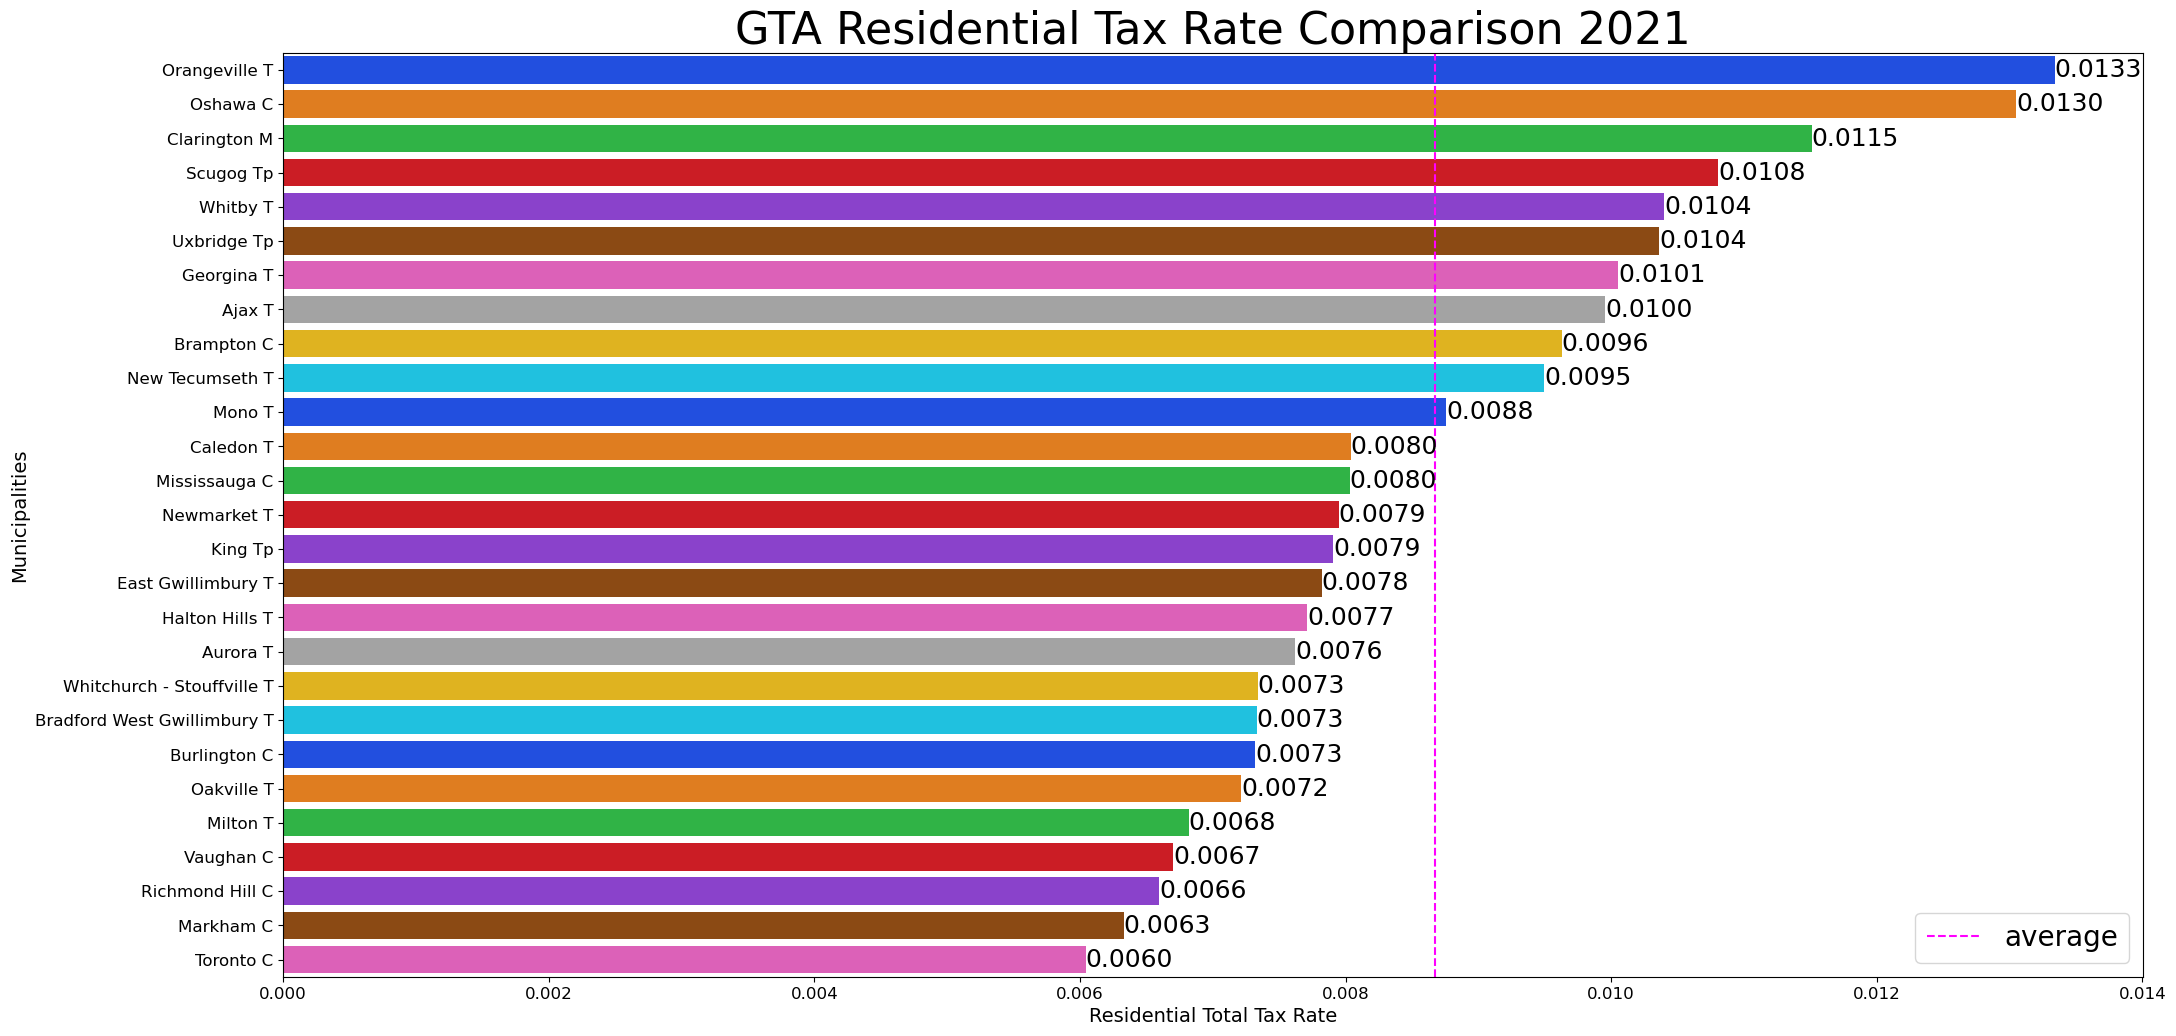

In [66]:
data=gta_sL_ptax[gta_sL_ptax['Property Class'] == 'Residential'].sort_values(by='Total_TaxRate', ascending=False)

fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data, y='Municipality', x='Total_TaxRate', orient='h', palette='bright', dodge=False)
ax.set_xlabel('Residential Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('GTA Residential Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=18)
plt.axvline(data['Total_TaxRate'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

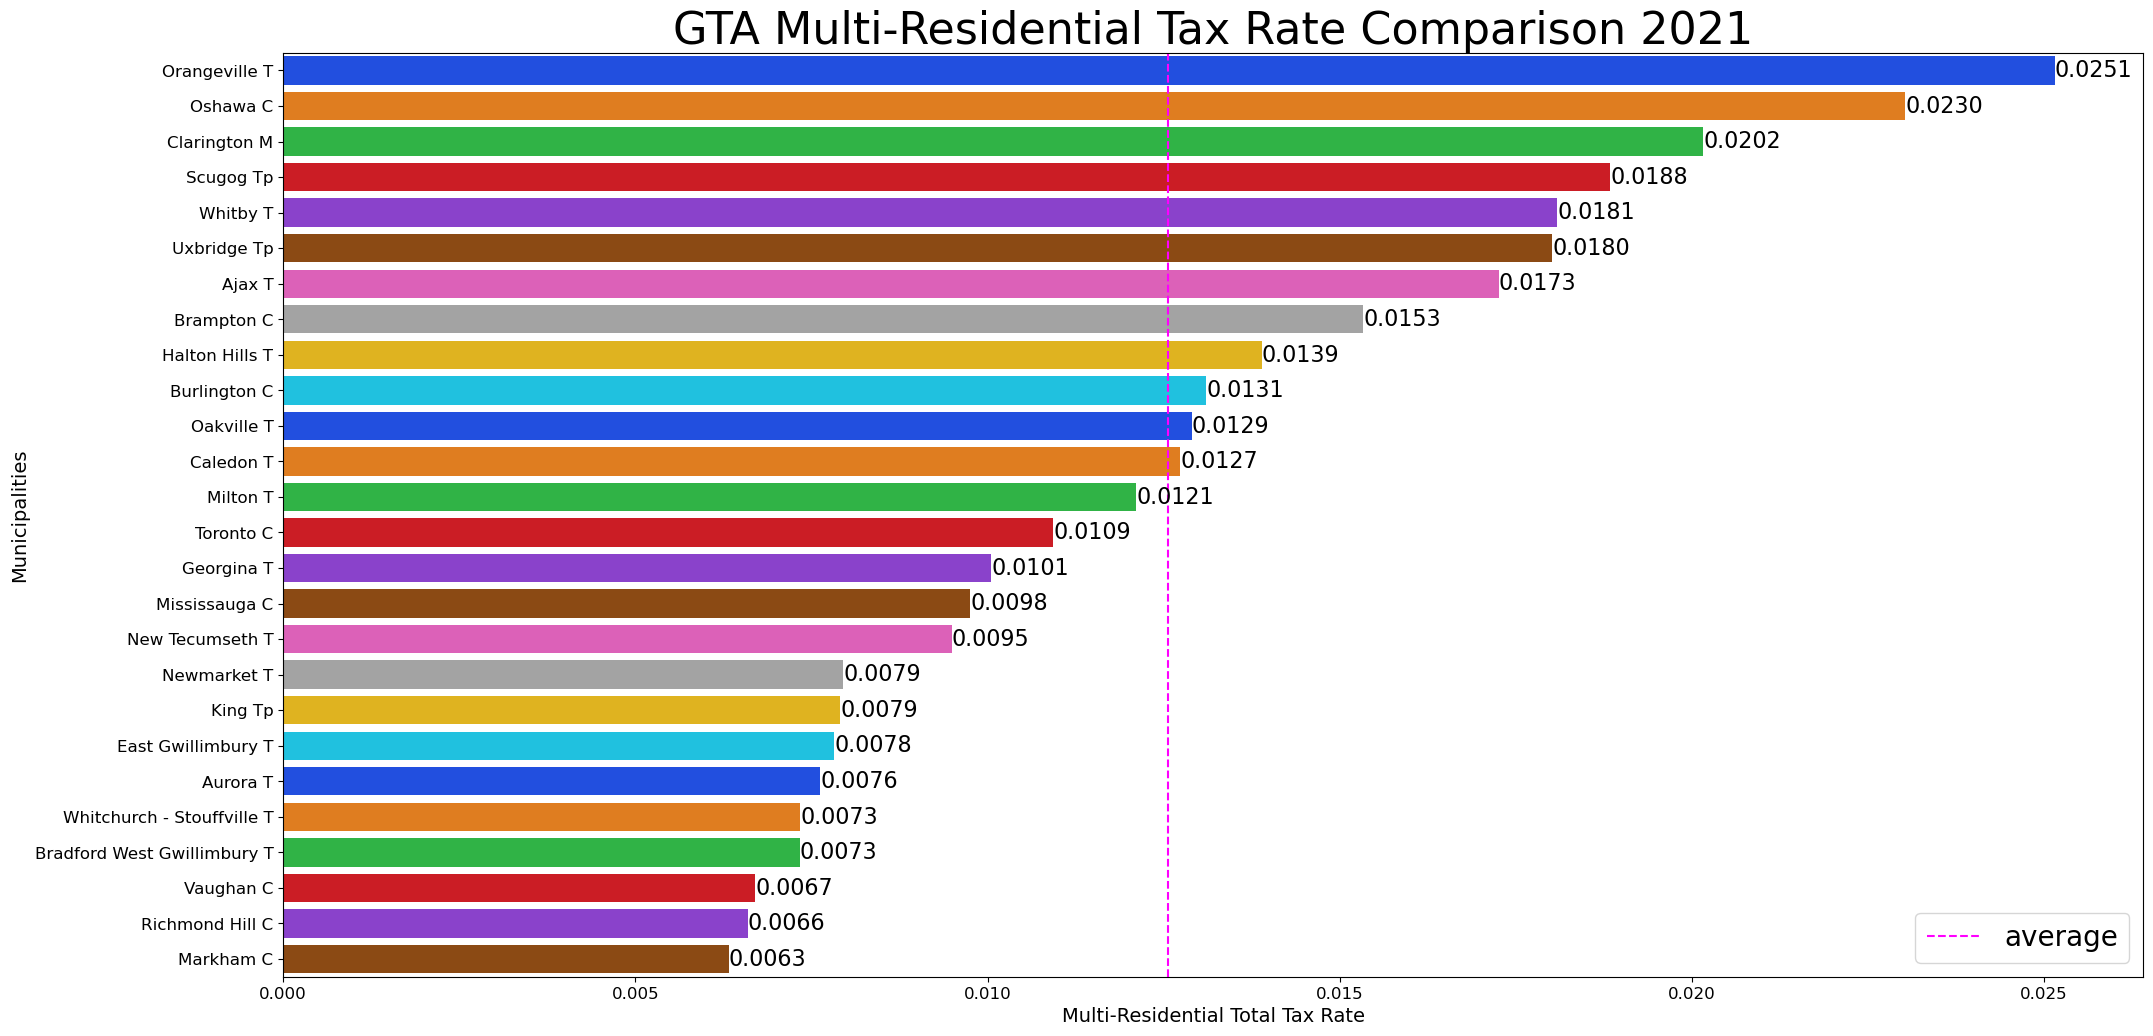

In [67]:
data=gta_sL_ptax[gta_sL_ptax['Property Class'] == 'Multi-Residential'].sort_values(by='Total_TaxRate', ascending=False)

fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data, y='Municipality', x='Total_TaxRate', orient='h', palette='bright', dodge=False)
ax.set_xlabel('Multi-Residential Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('GTA Multi-Residential Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['Total_TaxRate'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

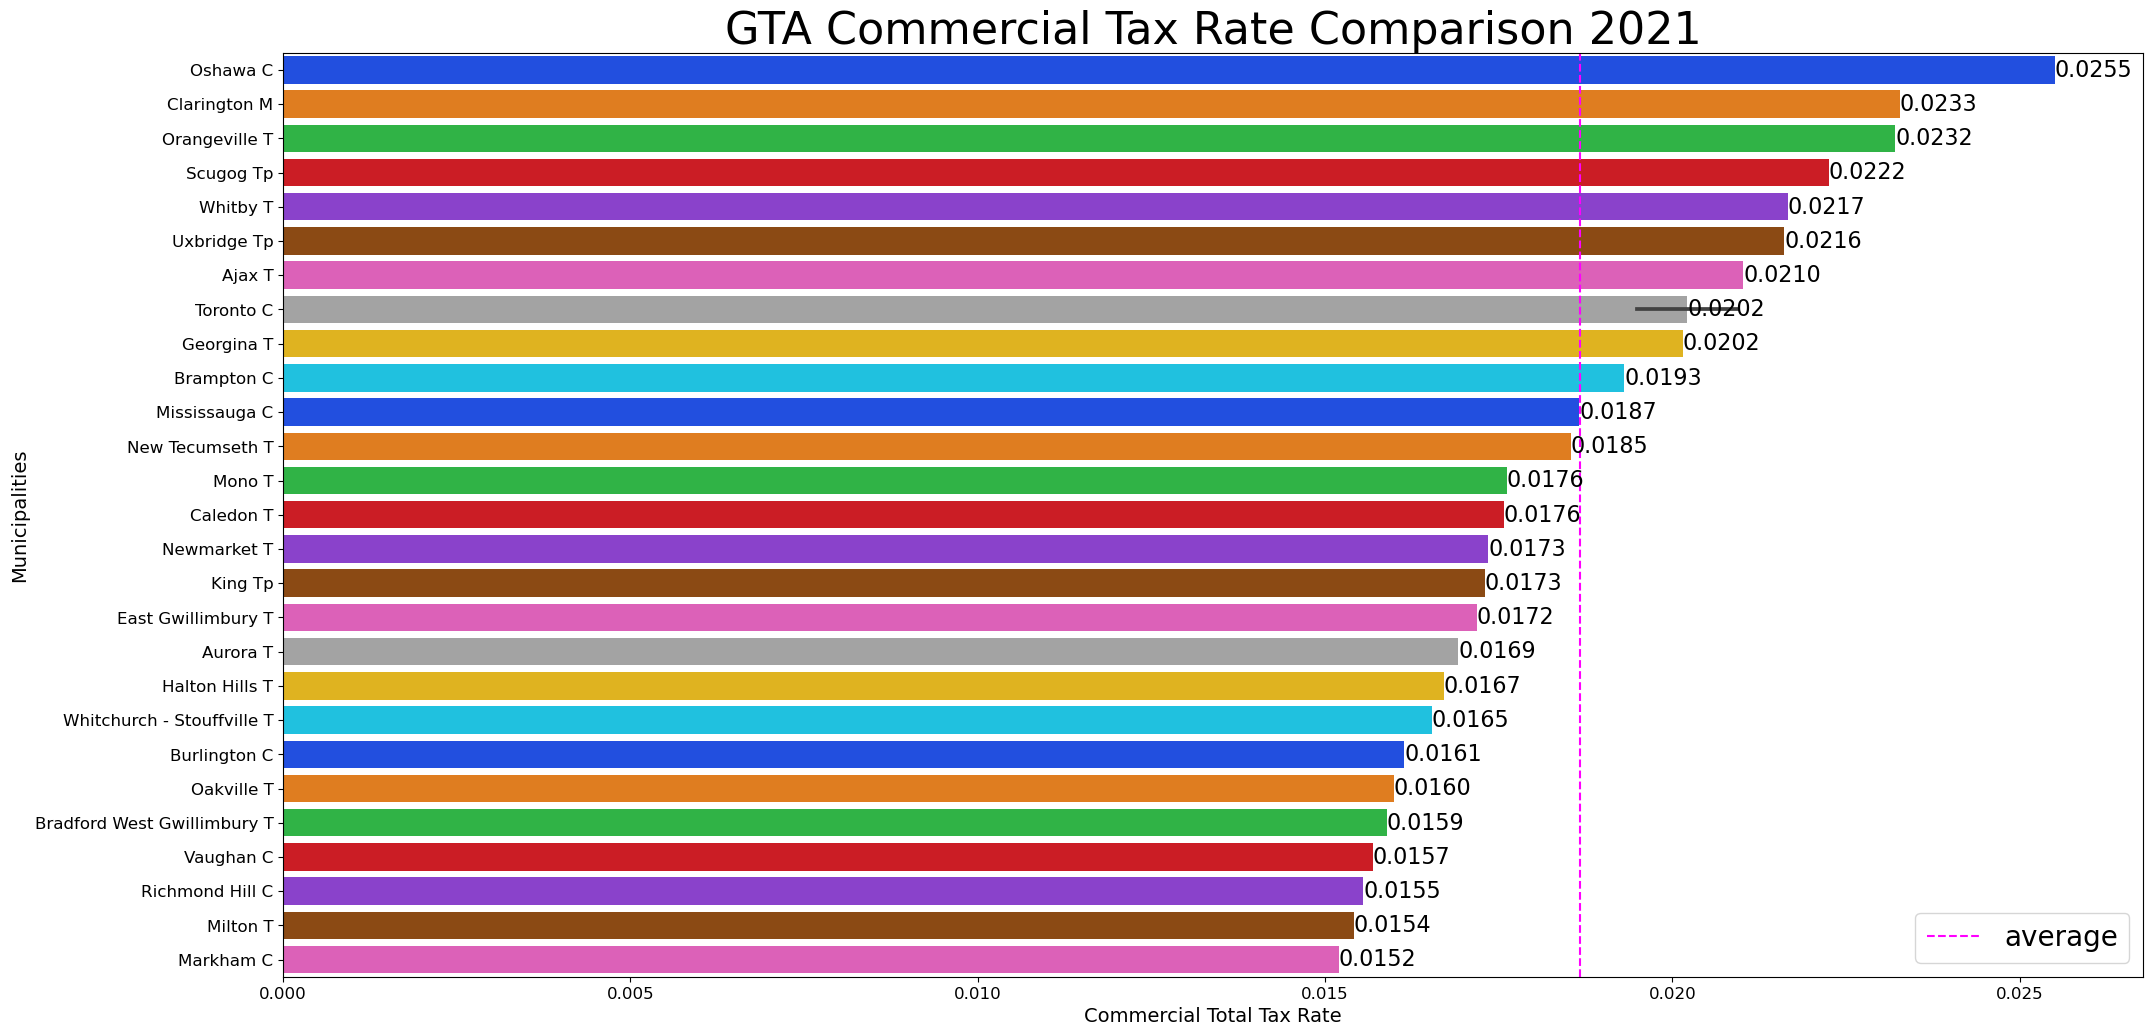

In [24]:
data=gta_sL_ptax[gta_sL_ptax['Property Class'] == 'Commercial'].sort_values(by='Total_TaxRate', ascending=False)

fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data, y='Municipality', x='Total_TaxRate', orient='h', palette='bright', dodge=False)
ax.set_xlabel('Commercial Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('GTA Commercial Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['Total_TaxRate'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

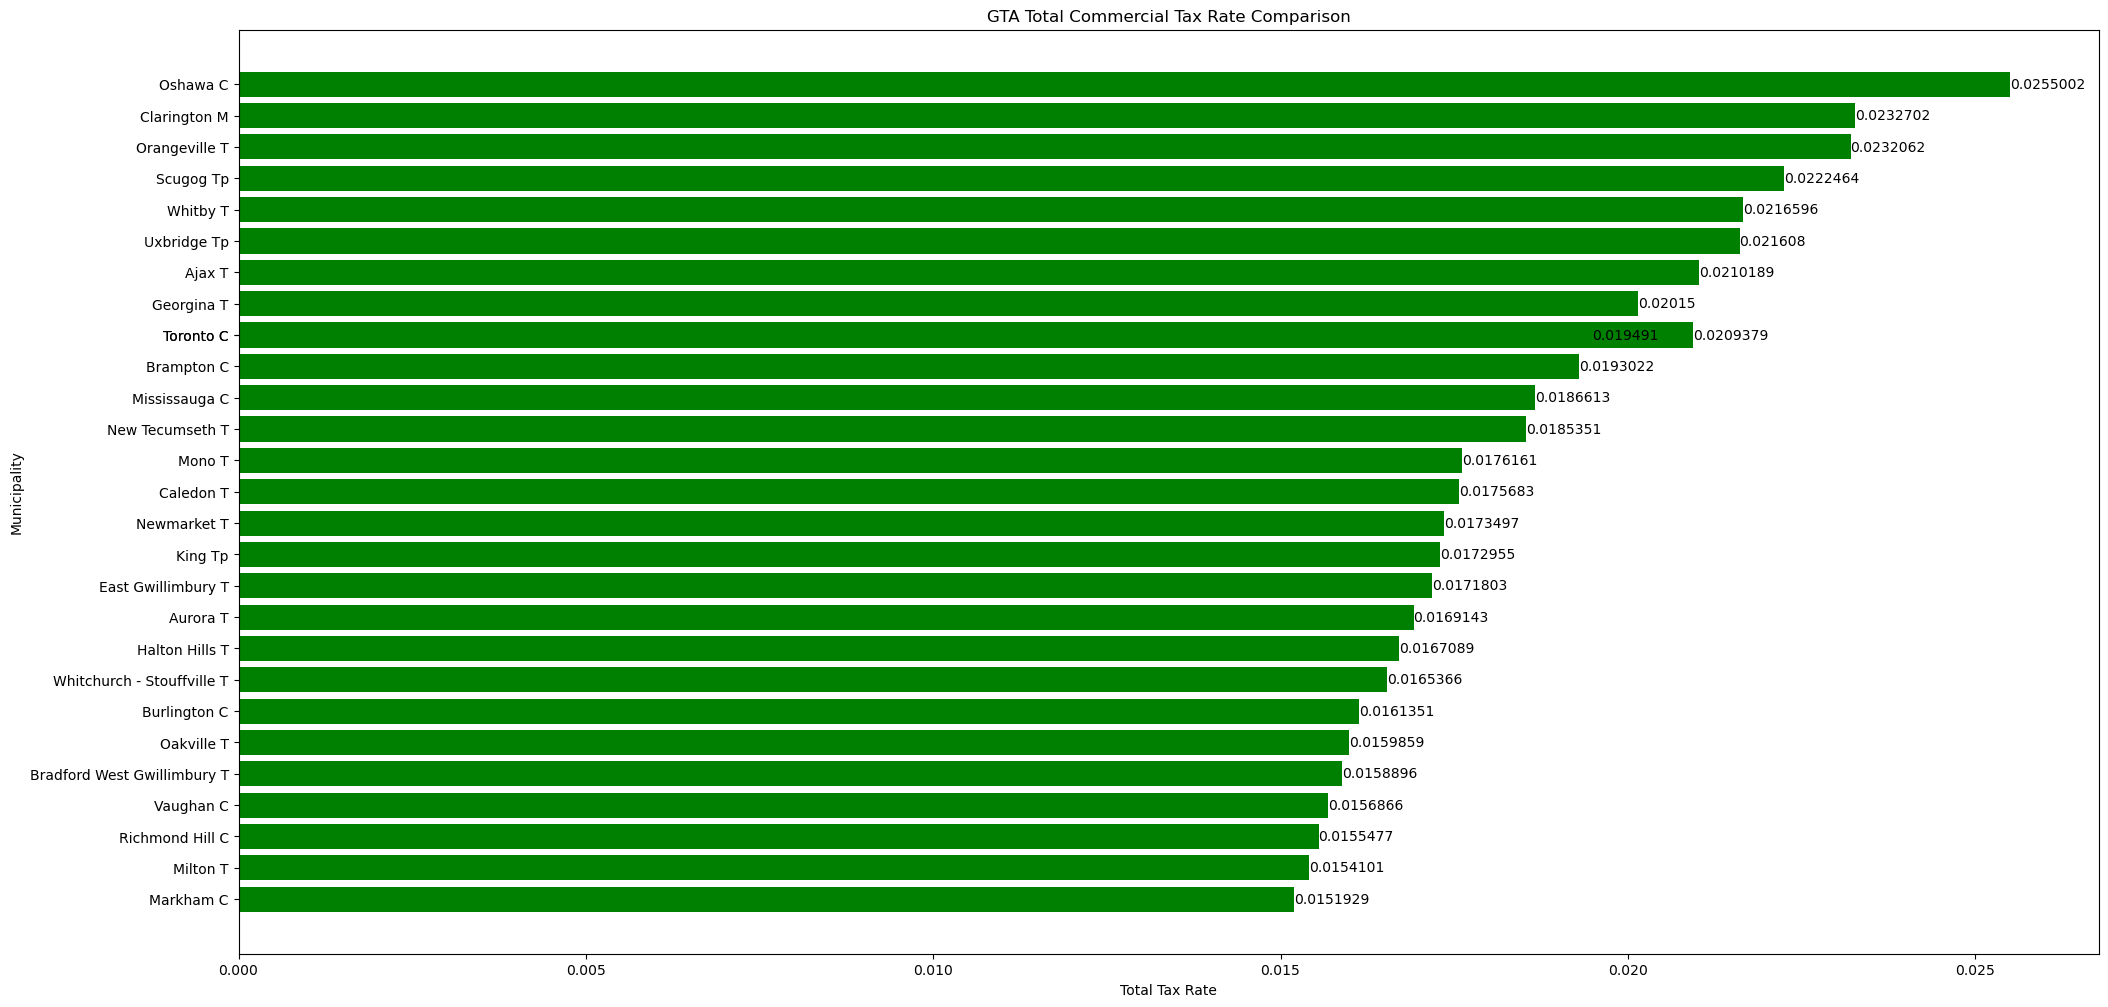

In [25]:
data = gta_sL_ptax[gta_sL_ptax['Property Class'] == 'Commercial'].sort_values(by='Total_TaxRate')

fig,ax = plt.subplots(figsize=(24,12))
bars = ax.barh(data['Municipality'],data['Total_TaxRate'],align='center', color=['green'])
ax.set_yticks(data['Municipality'])
ax.set_xlabel('Total Tax Rate')
ax.set_ylabel('Municipality')
ax.set_title('GTA Total Commercial Tax Rate Comparison')
ax.bar_label(bars)
plt.show()

In [26]:
gta_ptax_frame[(gta_ptax_frame['Property Class'] == 'Commercial') & (gta_ptax_frame['Municipality'] == 'Toronto C')]

,Year,Asmt Code,Municipality,MAH Code,MunID,UT,Tier,MSO,Line,Levy Area,22 Levy Area Name,RTC/RTQ,Tax\nBand,Property Class,Tax Rate Description,Tax Ratio,% Full Rate,CVA Assessment,Phase-In Taxable Assessment,LtSt_TaxRate,Ut_Rate,Education_Rate,Total_TaxRate,LT/ST\nTaxes,UT\nTaxes,EDUC\nTaxes,TOTAL\nTaxes,Last Update
7064,2021,1999,Toronto C,1106,20002,1,ST,11,211,0,Toronto C,CT,L,Commercial,Full Occupied,2.5743,1.0,2.035952e+10,2.035952e+10,0.011090,NaN,0.008401,0.019491,225784660,0,171042383,396827043,2022-09-29
7065,2021,1999,Toronto C,1106,20002,1,ST,11,213,0,Toronto C,CT,H,Commercial,Full Occupied,2.5743,1.0,3.496227e+10,3.496227e+10,0.011913,NaN,0.009025,0.020938,416510029,0,315526067,732036096,2022-09-29


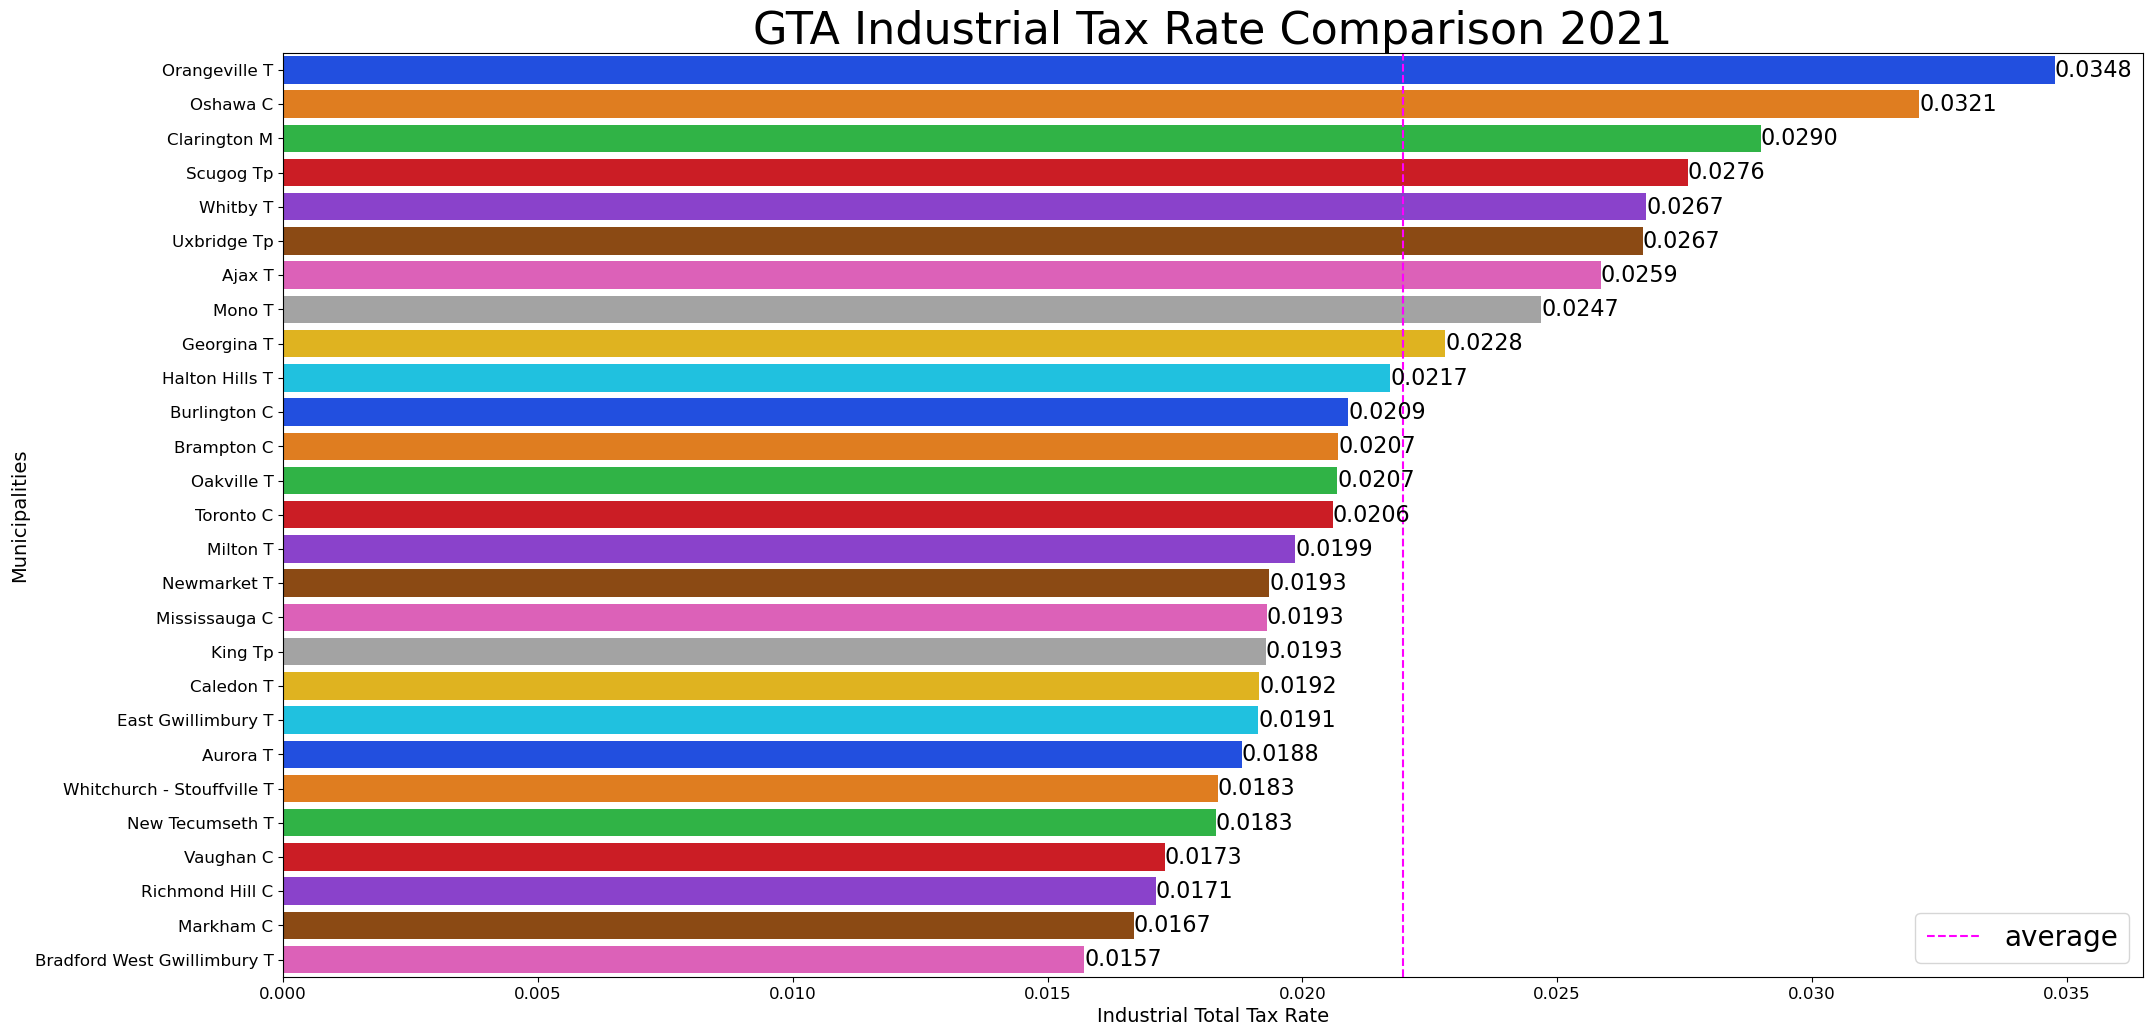

In [27]:
data=gta_sL_ptax[gta_sL_ptax['Property Class'] == 'Industrial'].sort_values(by='Total_TaxRate', ascending=False)

fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data, y='Municipality', x='Total_TaxRate', orient='h', palette='bright', dodge=False)
ax.set_xlabel('Industrial Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('GTA Industrial Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['Total_TaxRate'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

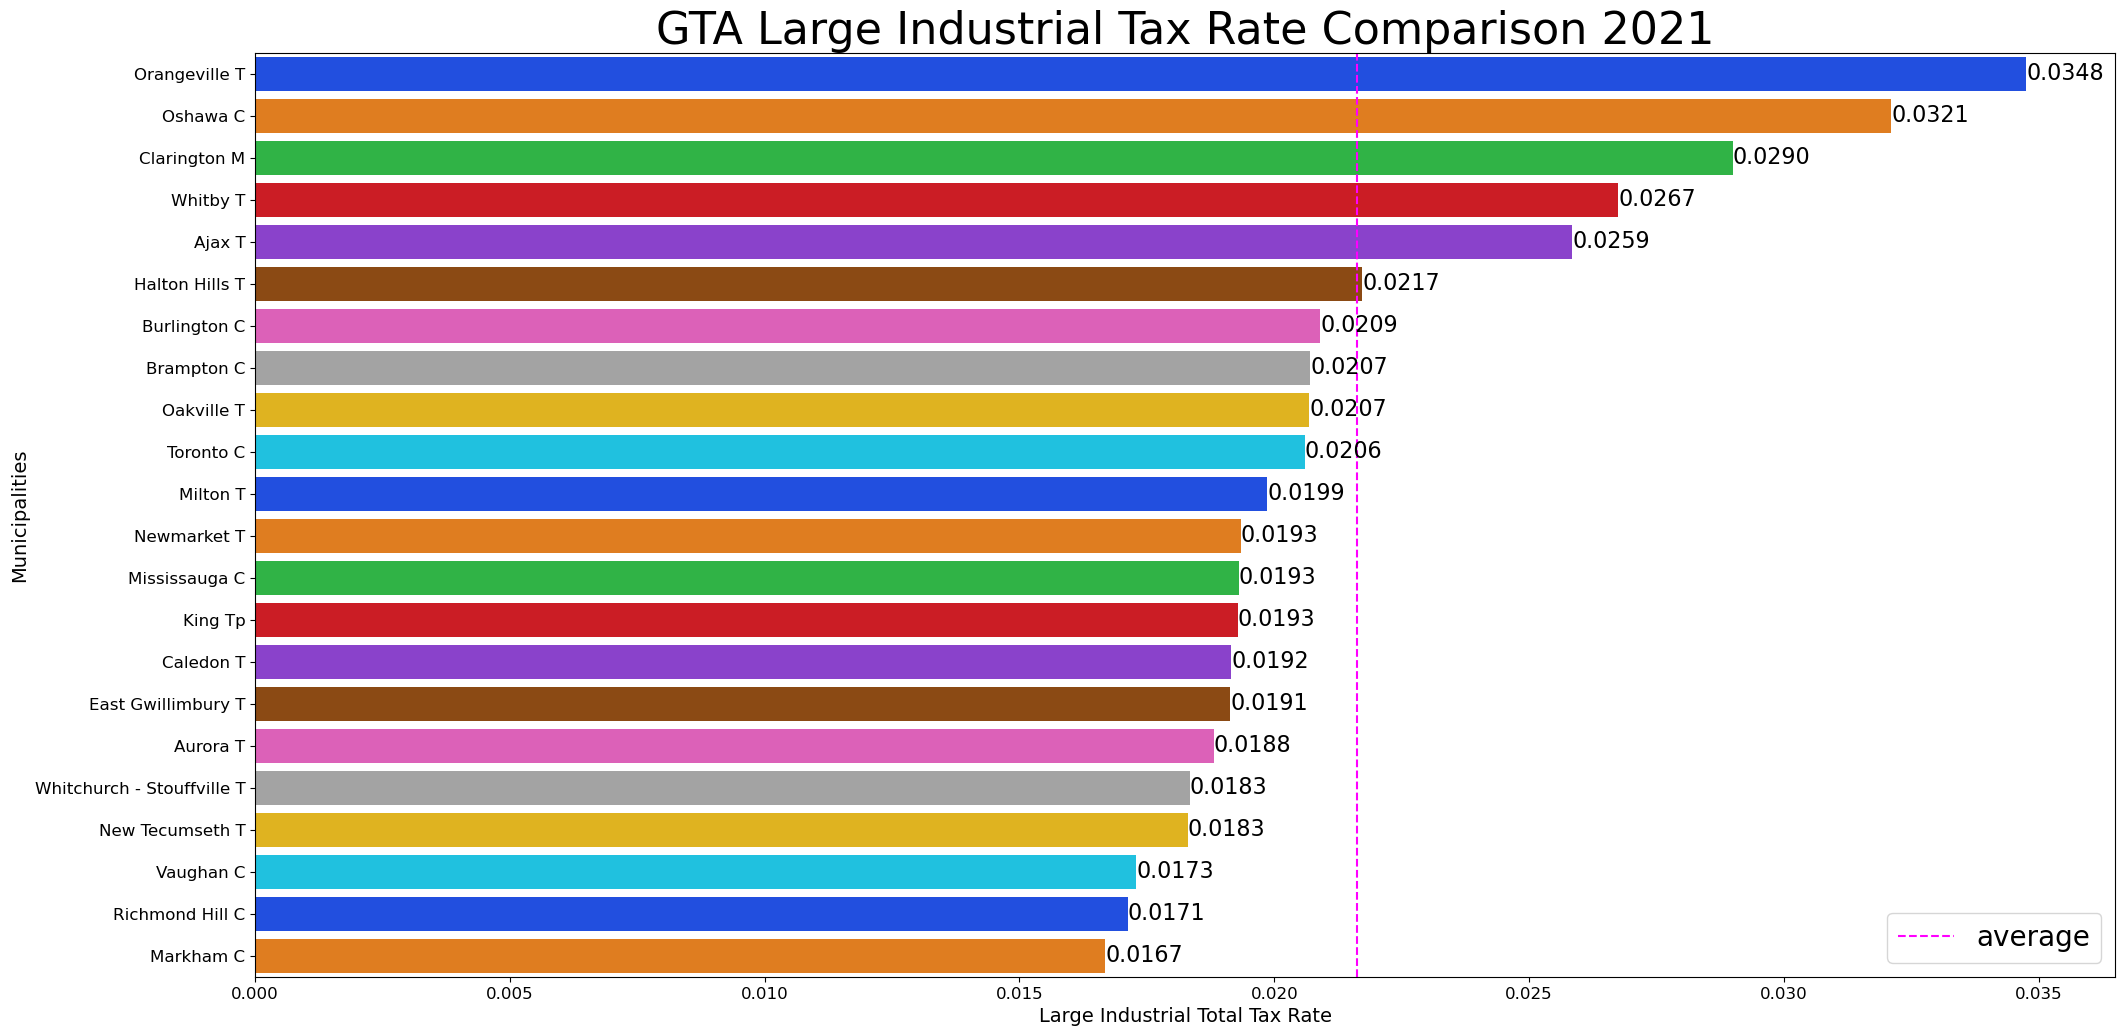

In [28]:
data=gta_sL_ptax[gta_sL_ptax['Property Class'] == 'Large Industrial'].sort_values(by='Total_TaxRate', ascending=False)

fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data, y='Municipality', x='Total_TaxRate', orient='h', palette='bright', dodge=False)
ax.set_xlabel('Large Industrial Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('GTA Large Industrial Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['Total_TaxRate'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

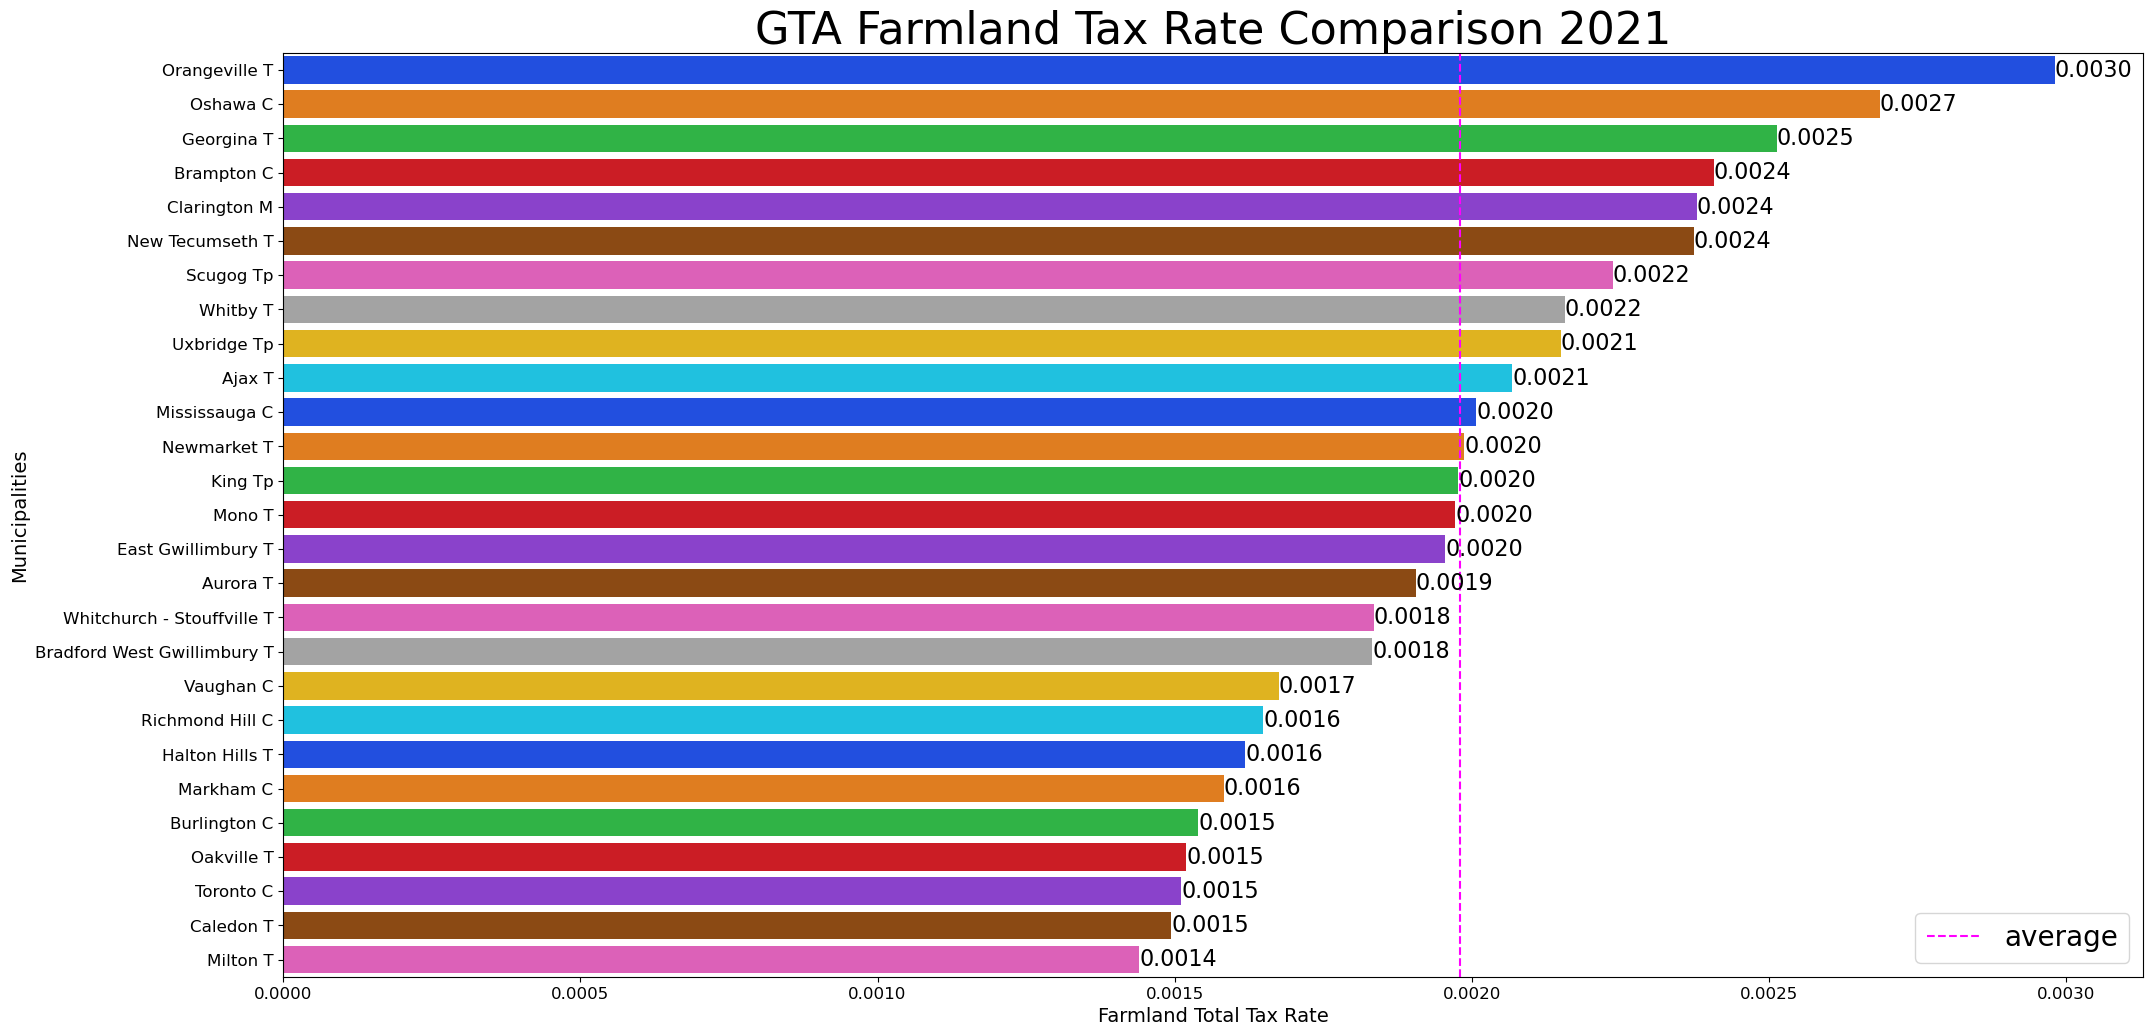

In [39]:
data=gta_sL_ptax[gta_sL_ptax['Property Class'] == 'Farmland'].sort_values(by='Total_TaxRate', ascending=False)

fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data, y='Municipality', x='Total_TaxRate', orient='h', palette='bright', dodge=False)
ax.set_xlabel('Farmland Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipalities', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('GTA Farmland Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['Total_TaxRate'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

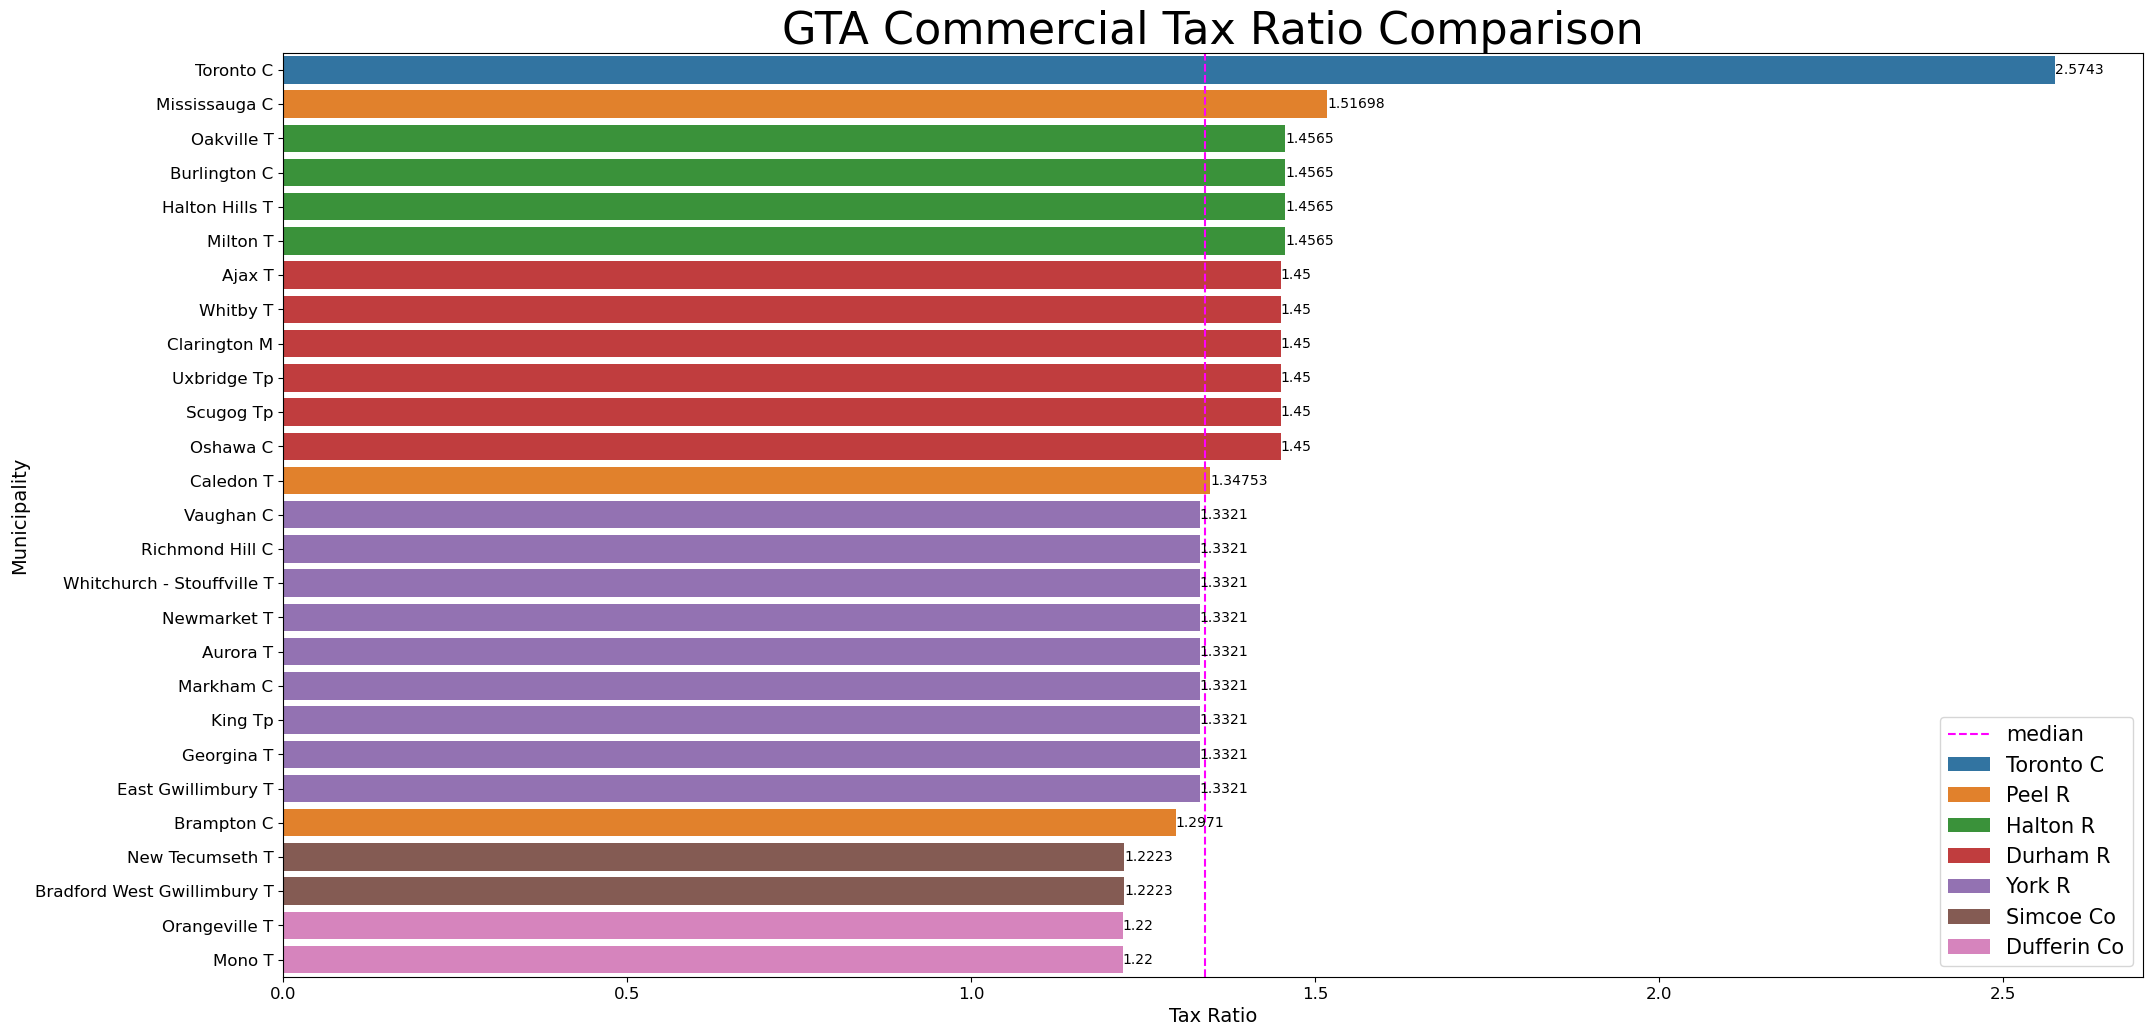

In [40]:
data = gta_sL_ptax[['Municipality', 'Property Class', 'Tax Ratio', 'Region']][gta_sL_ptax['Property Class'].isin(['Commercial'])]

fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data.sort_values(by='Tax Ratio', ascending=False), y='Municipality', x='Tax Ratio', hue='Region', orient='h', dodge=False)
ax.set_xlabel('Tax Ratio', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
ax.set_title('GTA Commercial Tax Ratio Comparison', fontsize=32)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
plt.axvline(data['Tax Ratio'].median(), color='magenta', linestyle='dashed', label='median')
plt.legend(loc='lower right', prop={'size':15})
plt.show()

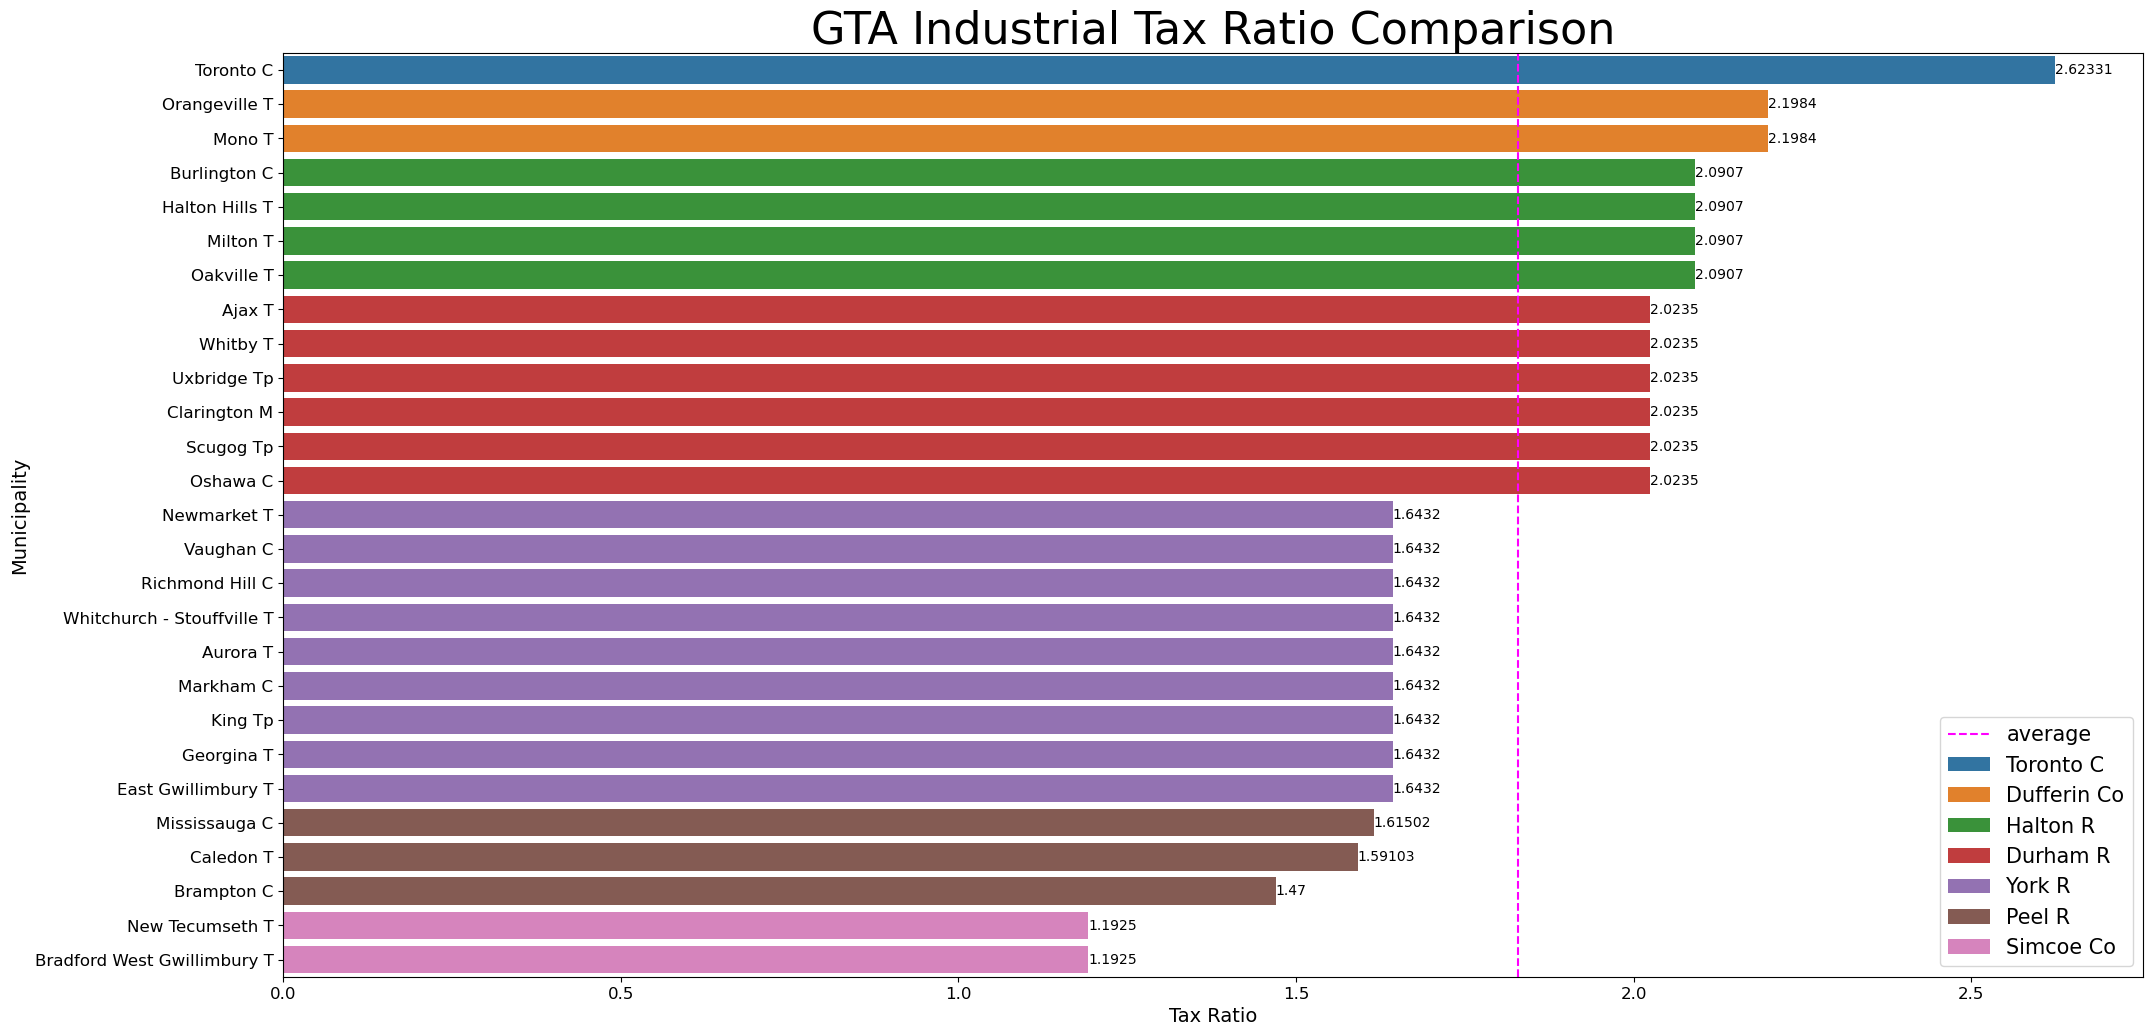

In [41]:
data = gta_sL_ptax[['Municipality', 'Property Class', 'Tax Ratio', 'Region']][gta_sL_ptax['Property Class'].isin(['Industrial'])]

fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data.sort_values(by='Tax Ratio', ascending=False), y='Municipality', x='Tax Ratio', hue='Region', orient='h', dodge=False)
ax.set_xlabel('Tax Ratio', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
ax.set_title('GTA Industrial Tax Ratio Comparison', fontsize=32)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
plt.axvline(data['Tax Ratio'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':15})
plt.show()

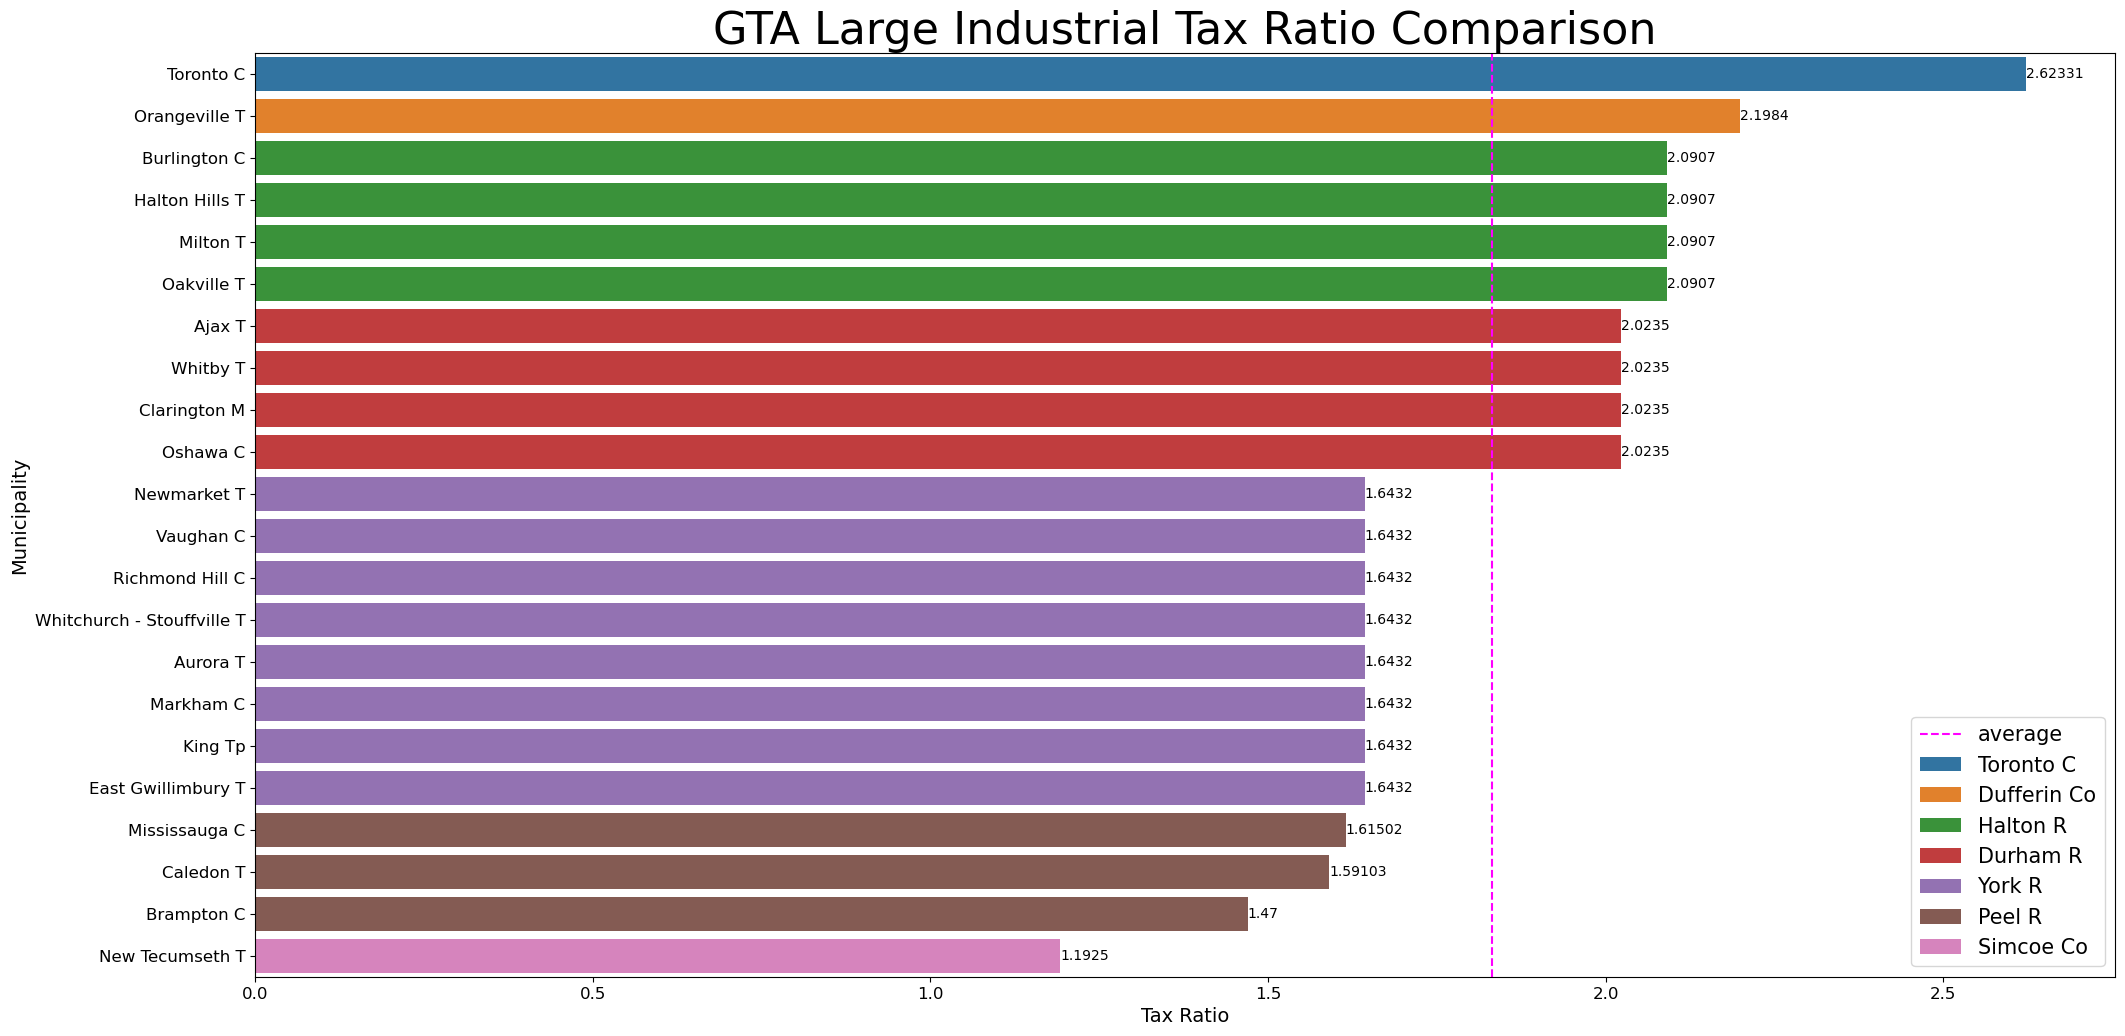

In [42]:
data = gta_sL_ptax[['Municipality', 'Property Class', 'Tax Ratio', 'Region']][gta_sL_ptax['Property Class'].isin(['Large Industrial'])]

fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data.sort_values(by='Tax Ratio', ascending=False), y='Municipality', x='Tax Ratio', hue='Region', orient='h', dodge=False)
ax.set_xlabel('Tax Ratio', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
ax.set_title('GTA Large Industrial Tax Ratio Comparison', fontsize=32)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
plt.axvline(data['Tax Ratio'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':15})
plt.show()